In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
# Paths for csv files

path_cape_town='../Listings/cape_town_listings.csv'
path_hong_kong='../Listings/hong_kong_listings.csv'
path_lisbon='../Listings/lisbon_listings.csv'
path_london='../Listings/london_listings.csv'
path_ny='../Listings/ny_listings.csv'
path_oslo='../Listings/oslo_listings.csv'
path_quebec='../Listings/quebec_listings.csv'
path_singapore='../Listings/singapore_listings.csv'
path_sydney='../Listings/sydney_listings.csv'
path_tokyo='../Listings/tokyo_listings.csv'

In [3]:
def cities (dataframe):
    # city_listings = pd.read_csv('../Listings/lisbon_listings.csv')
    city_listings = pd.read_csv(dataframe)
    city_listings_back_up = city_listings.copy()
    
    # it deletes the automatic generated first column index
    city_listings = city_listings.set_index('id')
    columns_to_drop = ['scrape_id','picture_url','host_url','host_name','host_location','host_about',
    'host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_thumbnail_url',
    'host_picture_url','host_neighbourhood','host_listings_count','host_verifications',
    'host_has_profile_pic','host_identity_verified','latitude','longitude','bathrooms','minimum_minimum_nights',
    'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60',
    'availability_90','availability_365','calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d',
    'review_scores_accuracy','review_scores_checkin','review_scores_communication','license','instant_bookable',
    'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_since',
    'neighbourhood','review_scores_rating','last_review','reviews_per_month','review_scores_cleanliness']
    
    # drop columns that are not needed
    city_listings.drop(columns= columns_to_drop, inplace=True)
    
    # in case of duplicate
    city_listings.drop_duplicates(inplace=True)
    
    # change column dtype from object to float = price
    city_listings['price'] = city_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)
    # change column dtype from object to datetime
    city_listings['last_scraped'] = pd.to_datetime(city_listings['last_scraped'])
       
    # bathrooms_text column change dtype
    city_listings['bathrooms_text'] = city_listings['bathrooms_text'].str.replace(' *[Ss]hared', '').str.replace(' bath.*', '').str.replace(' *[Pp]rivate','').str.replace(' *[Hh]alf-bath','0.5').astype(float)
    city_listings['bathrooms'] = city_listings['bathrooms_text']
    
    # Create col with amenities_len
    city_listings['amenities_len'] = city_listings['amenities'].str.split(",").str.len()
    
    # create a copy with less columns to create stats (wished infos in old)
    listings_final = city_listings[['last_scraped','name','neighbourhood_cleansed','review_scores_location',
    'room_type','accommodates','bedrooms','price','review_scores_value']].copy()
    
    listings_corr = city_listings[['last_scraped', 'name','neighbourhood_cleansed','host_total_listings_count',
    'property_type', 'room_type','accommodates','bathrooms','bedrooms','beds','amenities','amenities_len',
    'price','number_of_reviews','review_scores_location','review_scores_value']].copy()
    
    # deleting rows from reviews if NaN
    # listings_final.dropna(subset = ["review_scores_value"], inplace=True)
    listings_final.dropna(inplace=True)
    # listings_corr.dropna(inplace=True)
    
    return listings_final, listings_corr, city_listings

In [4]:
# Research / exploring / no need to run
# lisbon_listings_short.groupby('review_scores_value').price.agg(['mean','count','min','max'])
# lisbon_listings_short.groupby('review_scores_value').agg(['mean','count','min','max'])
# lisbon_listings_short.groupby('review_scores_value').price.agg(['mean','count','min','max'])
# tokyo_listings_short
# tokyo_listing2
# pd.DataFrame(tokyo_listings_short.isna().sum()) - dice suma por cada row d cuantos NaN
# mean_lisbon['city'] = 'Lisbon' - crea columna nueva y todas las rows son Lisbon
# high_score_rate = lisbon_listings_short[lisbon_listings_short['review_scores_value'] >= 10 ] - condition
# mean = mean_lisbon.merge(right=mean_london, how="inner", left_on="review_scores_value", right_on="review_scores_value")

In [5]:
# Cities datasets

# 1 Cape Town
cape_town_listings_short, cape_town_listings_corr, cape_town_listing2 = cities(path_cape_town)   # lisbon_listing2 more detailed if details need to return
cape_town_listings_corr['price'] = round(cape_town_listings_corr['price']*0.058, 2)
# mean
mean_cape_town = round(cape_town_listings_short[cape_town_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_cape_town.columns = ['ave_price_cape_town']
# min
min_cape_town = round(cape_town_listings_short[cape_town_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_cape_town.columns = ['min_price_cape_town']

# 2 Hong Kong
hong_kong_listings_short, hong_kong_listings_corr, hong_kong_listing2 = cities(path_hong_kong)   # lisbon_listing2 more detailed if details need to return
hong_kong_listings_corr['price'] = round(hong_kong_listings_corr['price']*0.11, 2)
# mean
mean_hong_kong = round(hong_kong_listings_short[hong_kong_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_hong_kong.columns = ['ave_price_hong_kong']
# min
min_hong_kong = round(hong_kong_listings_short[hong_kong_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_hong_kong.columns = ['min_price_hong_kong']

# 3 Lisbon
lisbon_listings_short, lisbon_listings_corr, lisbon_listing2 = cities(path_lisbon)   # lisbon_listing2 more detailed if details need to return
# mean
mean_lisbon = round(lisbon_listings_short[lisbon_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_lisbon.columns = ['ave_price_lisbon']
# min
min_lisbon = round(lisbon_listings_short[lisbon_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_lisbon.columns = ['min_price_lisbon']

# 4 London
london_listings_short, london_listings_corr, london_listing2 = cities(path_london)
london_listings_corr['price'] = round(london_listings_corr['price']*1.15, 2)
#mean
mean_london = round(london_listings_short[london_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_london.columns = ['ave_price_london']
#min
min_london = round(london_listings_short[london_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_london.columns = ['min_price_london']

# 5 New York
ny_listings_short, ny_listings_corr, ny_listing2 = cities(path_ny)
ny_listings_corr['price'] = round(ny_listings_corr['price']*0.83, 2)
# mean
mean_ny = round(ny_listings_short[ny_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_ny.columns = ['ave_price_ny']
# min
min_ny = round(ny_listings_short[ny_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_ny.columns = ['min_price_ny']

# 6 Oslo
oslo_listings_short, oslo_listings_corr, oslo_listing2 = cities(path_oslo)
oslo_listings_corr['price'] = round(oslo_listings_corr['price']*0.10, 2)
# mean
mean_oslo = round(oslo_listings_short[oslo_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_oslo.columns = ['ave_price_oslo']
# min
min_oslo = round(oslo_listings_short[oslo_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_oslo.columns = ['min_price_oslo']

# 7 Quebec
quebec_listings_short, quebec_listings_corr, quebec_listing2 = cities(path_quebec)
quebec_listings_corr['price'] = round(quebec_listings_corr['price']*0.67, 2)
# mean
mean_quebec = round(quebec_listings_short[quebec_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_quebec.columns = ['ave_price_quebec']
# min
min_quebec = round(quebec_listings_short[quebec_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_quebec.columns = ['min_price_quebec']

# 8 Singapore
singapore_listings_short, singapore_listings_corr, singapore_listing2 = cities(path_singapore)
singapore_listings_corr['price'] = round(singapore_listings_corr['price']*0.62, 2)
# mean
mean_singapore = round(singapore_listings_short[singapore_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_singapore.columns = ['ave_price_singapore']
# min
min_singapore = round(singapore_listings_short[singapore_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_singapore.columns = ['min_price_singapore']

# 9 Sydney
sydney_listings_short, sydney_listings_corr, sydney_listing2 = cities(path_sydney)
sydney_listings_corr['price'] = round(sydney_listings_corr['price']*0.64, 2)
# mean
mean_sydney = round(sydney_listings_short[sydney_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_sydney.columns = ['ave_price_sydney']
# min
min_sydney = round(sydney_listings_short[sydney_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_sydney.columns = ['min_price_sydney']

# 10 Tokyo
tokyo_listings_short, tokyo_listings_corr, tokyo_listing2 = cities(path_tokyo)
tokyo_listings_corr['price'] = round(tokyo_listings_corr['price']*0.0072, 2)
# mean
mean_tokyo = round(tokyo_listings_short[tokyo_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].mean().head(10), 2)
mean_tokyo.columns = ['ave_price_tokyo']
# min
min_tokyo = round(tokyo_listings_short[tokyo_listings_short['room_type'] == 'Entire home/apt'].groupby(['review_scores_value'])[['price']].min().head(10), 2)
min_tokyo.columns = ['min_price_tokyo']

In [6]:
# Create 1 DataFrame with all cities with average price

mean = mean_lisbon
mean['ave_price_cape_town'] = round(mean_cape_town['ave_price_cape_town']*0.058, 2)
mean['ave_price_hong_kong'] = round(mean_hong_kong['ave_price_hong_kong']*0.11, 2)
mean['ave_price_london'] = round(mean_london['ave_price_london']*1.15, 2)
mean['ave_price_ny'] = round(mean_ny['ave_price_ny']*0.83, 2)
mean['ave_price_oslo'] = round(mean_oslo['ave_price_oslo']*0.10, 2)
mean['ave_price_quebec'] = round(mean_quebec['ave_price_quebec']*0.67, 2)
mean['ave_price_singapore'] = round(mean_singapore['ave_price_singapore']*0.62, 2)
mean['ave_price_sydney'] = round(mean_sydney['ave_price_sydney']*0.64, 2)
mean['ave_price_tokyo'] = round(mean_tokyo['ave_price_tokyo']*0.0072, 2)
# mean

# how to show only index 10
mean_score_10 = mean[mean.index == 10 ]
# mean_score_10.transpose()

In [7]:
# Create 1 DataFrame with all cities with min price

min_price = min_lisbon
min_price['min_price_cape_town'] = round(min_cape_town['min_price_cape_town']*0.058, 2)
min_price['min_price_hong_kong'] = round(min_hong_kong['min_price_hong_kong']*0.11, 2)
min_price['min_price_london'] = round(min_london['min_price_london']*1.15, 2)
min_price['min_price_ny'] = round(min_ny['min_price_ny']*0.83, 2)
min_price['min_price_oslo'] = round(min_oslo['min_price_oslo']*0.10, 2)
min_price['min_price_quebec'] = round(min_quebec['min_price_quebec']*0.67, 2)
min_price['min_price_singapore'] = round(min_singapore['min_price_singapore']*0.62, 2)
min_price['min_price_sydney'] = round(min_sydney['min_price_sydney']*0.64, 2)
min_price['min_price_tokyo'] = round(min_tokyo['min_price_tokyo']*0.0072, 2)
# mean

# how to show only index 10
min_score_10 = min_price[min_price.index == 10 ]
# min_score_10.transpose()

# graph done directly in canva for presentation

([<matplotlib.axis.XTick at 0x11b55db50>,
 [Text(0, 0, 'Lisbon'),
  Text(1, 0, 'Cape Town'),
  Text(2, 0, 'Hong Kong'),
  Text(3, 0, 'London'),
  Text(4, 0, 'New York'),
  Text(5, 0, 'Oslo'),
  Text(6, 0, 'Quebec'),
  Text(7, 0, 'Singapore'),
  Text(8, 0, 'Sydney'),
  Text(9, 0, 'Tokyo')])

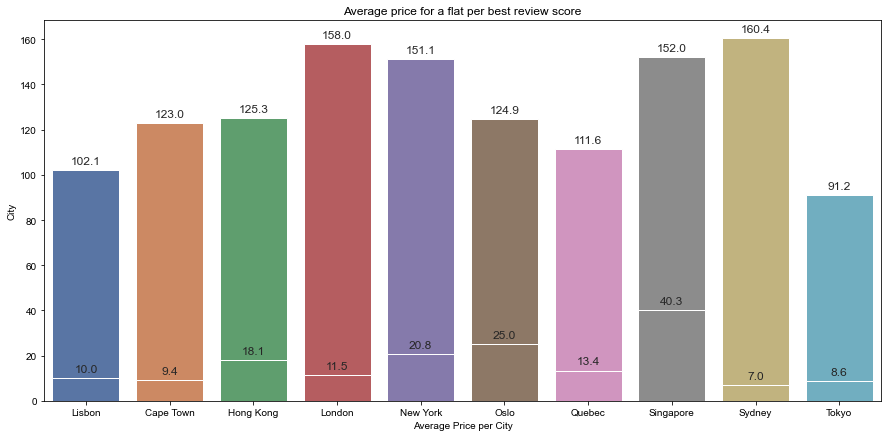

In [8]:
# Plot for all cities on mean

fig, ax = plt.subplots(1,figsize=(15,7))
ax.set_title('Average price for a flat per best review score')

sns.set_theme(style="whitegrid")
# sns.barplot(x= , y=mean.index, data = mean)
splot = sns.barplot(data = mean_score_10)
# sns.barplot(data = mean_score_10)

splot2 = sns.barplot(data = min_score_10)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ax.set_xlabel('Average Price per City')
ax.set_ylabel('City')

plt.sca(ax)
plt.xticks(range(10),['Lisbon','Cape Town','Hong Kong','London','New York','Oslo','Quebec','Singapore','Sydney','Tokyo'])

# plt.savefig("Average price for a flat per best review score", dpi=700)

In [9]:
# ny_listing2['host_total_listings_count'].value_counts()
# ny_listing2['host_id'].value_counts()

# tokyo_listing2['host_total_listings_count'].value_counts()
# tokyo_listing2['host_id'].value_counts()

<AxesSubplot:>

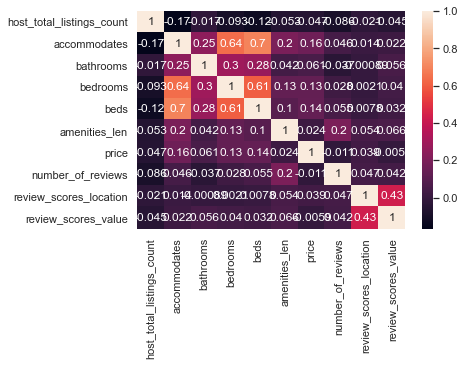

In [10]:
# Corr / heatmap without filters

sns.heatmap(tokyo_listings_corr.corr(),annot=True)
# plt.savefig("Heatmap", dpi=700)

In [11]:
# Filter to delete outliers / exploring

# tokyo_listings_corr.columns
# tokyo_listings_short.columns
# tokyo_listings_corr['room_type'].value_counts()
# tokyo_listings_corr['property_type'].value_counts()

In [12]:
# Correlation between price and features when private flat?

# new df for corr - changing order of col in _corr
tokyo_listings_corr2 = tokyo_listings_corr[['last_scraped','name','neighbourhood_cleansed','property_type', 
'room_type','accommodates','bathrooms','bedrooms','beds','amenities','amenities_len','price',
'number_of_reviews','review_scores_location','review_scores_value']].copy()

# tokyo_listings_corr2['bathrooms'] = tokyo_listings_corr2['bathrooms']

# new df _corr2 with filters only 'Entire home/apt' and specific cols
tokyo_listings_corr2 = tokyo_listings_corr.loc[tokyo_listings_corr['room_type']=='Entire home/apt',
['amenities_len','bedrooms', 'beds','accommodates','bathrooms','price']]

# drop NaN values/rows
tokyo_listings_corr2.dropna(subset = ['bedrooms','bathrooms','beds'], inplace=True)

# filtered/shows the outliers out
# tokyo_listings_corr.loc[tokyo_listings_corr['bathrooms'] >= 7]
# tokyo_listings_corr['bathrooms'].value_counts()

<AxesSubplot:>

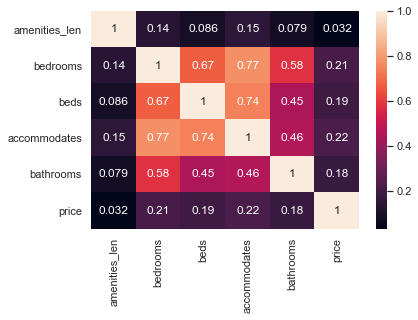

In [13]:
# heatmap with filters _corr2
sns.heatmap(tokyo_listings_corr2.corr(),annot=True)
# plt.savefig("Heatmap2", dpi=700)

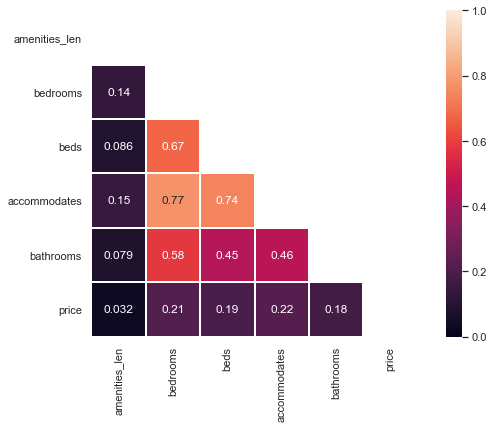

In [14]:
# How to do half heatmap with Seaborn - FINAL MAP for presentation

mask = np.zeros_like(tokyo_listings_corr2.corr().abs())    #.abs() si es negativo, lo cambia a absoluto
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(tokyo_listings_corr2.corr().abs(), mask=mask,
                square=True, annot=True, linewidths=1,
                vmax = 1, vmin = 0, fmt='.2g')
# plt.savefig("Heatmap3", dpi=700)

In [ ]:
# exploring / need to be in 1 sep cell each

# sns.boxplot(tokyo_listings_corr2['price']) 
# sns.boxplot(tokyo_listings_corr2[tokyo_listings_corr2['price'] <500]['price'])

# too many beds
# sns.boxplot(tokyo_listings_corr2['beds']) 

# sns.boxplot(tokyo_listings_corr2[tokyo_listings_corr2['beds'] < 10]['beds'])
# sns.boxplot(tokyo_listings_corr2['bathrooms']) 

# sns.boxplot(tokyo_listings_corr2[tokyo_listings_corr2['bathrooms'] < 5]['bathrooms'])

# sns.boxplot(tokyo_listings_corr2['bathrooms']) 

In [15]:
# List of conditions:

cond1 = tokyo_listings_corr2['price'] < 500
cond2 = tokyo_listings_corr2['beds'] < 10
cond3 = tokyo_listings_corr2['bathrooms'] < 5
cond4 = tokyo_listings_corr2['accommodates'] < 10

In [16]:
tokyo_listings_corr_final = tokyo_listings_corr2[(cond1) | (cond2) | (cond3) | (cond4)]

<AxesSubplot:>

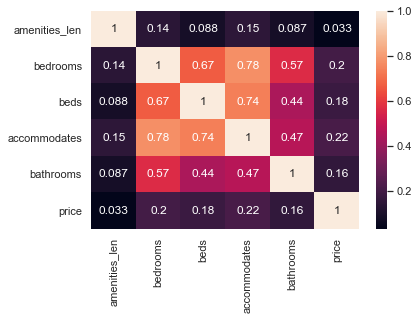

In [17]:
# heatmap with filters _corr2
sns.heatmap(tokyo_listings_corr_final.corr(),annot=True)

In [18]:
# Linear Corr

model = LinearRegression()

# X = tokyo_listings_corr_final.drop(columns='price')   with col 'amenities'
# y = tokyo_listings_corr_final['price']

X = tokyo_listings_corr_final.drop(columns='price')
y = np.log(tokyo_listings_corr_final['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

scaler = StandardScaler()

# Set the scaler
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model.fit(X_train_scaled,y_train) # predice el logaritmo del precio

y_prdict_log = model.predict(X_test_scaled)
y_prdict = np.exp(y_prdict_log) 

r2_score(np.exp(y_test),np.exp(y_prdict_log))

0.049736867442933264

<AxesSubplot:xlabel='price'>

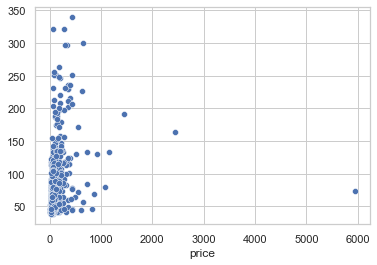

In [19]:
sns.scatterplot(x = np.exp(y_test), y = np.exp(y_prdict_log))

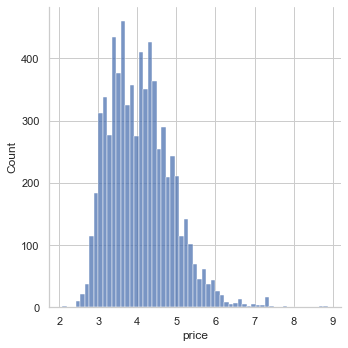

In [20]:
sns.displot(np.log(tokyo_listings_corr_final['price']))